# Linear Models for Classification: Logistic Regression

## Overview

**Logistic Regression** is a fundamental classification algorithm that models the probability of an instance belonging to a particular class. Despite its name, it's a **classification** algorithm, not regression.

## Mathematical Foundation

### Binary Classification

**Linear Combination**:
\[
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p = \beta^T x
\]

**Sigmoid Function** (maps to probability [0, 1]):
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

**Predicted Probability**:
\[
P(y=1 | x) = \sigma(\beta^T x) = \frac{1}{1 + e^{-\beta^T x}}
\]

**Decision Rule**:
\[
\hat{y} = \begin{cases} 
1 & \text{if } P(y=1|x) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
\]

### Loss Function (Log Loss / Cross-Entropy)

\[
L(\beta) = -\frac{1}{n}\sum_{i=1}^{n} [y_i \log(p_i) + (1-y_i)\log(1-p_i)]
\]

where \(p_i = P(y_i=1|x_i)\).

### Regularization

**L2 (Ridge)**:
\[
L(\beta) = -\frac{1}{n}\sum_{i=1}^{n} [y_i \log(p_i) + (1-y_i)\log(1-p_i)] + \frac{1}{2C}||\beta||^2
\]

**L1 (Lasso)**:
\[
L(\beta) = -\frac{1}{n}\sum_{i=1}^{n} [y_i \log(p_i) + (1-y_i)\log(1-p_i)] + \frac{1}{C}||\beta||_1
\]

Note: In sklearn, `C` is the **inverse** of regularization strength (larger C = less regularization).

## Topics Covered

1. Binary classification basics
2. Sigmoid function and probability interpretation
3. Decision boundaries
4. Multiclass classification (One-vs-Rest, Multinomial)
5. Regularization (L1, L2)
6. Model evaluation metrics
7. Real-world datasets
8. Probability calibration

## Setup and Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score, log_loss
)
from sklearn.datasets import make_classification, load_breast_cancer, load_iris, load_wine

np.random.seed(42)
sns.set_style('whitegrid')
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Understanding the Sigmoid Function

### 1.1 Sigmoid Visualization

/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_23230/456099699.py:19: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


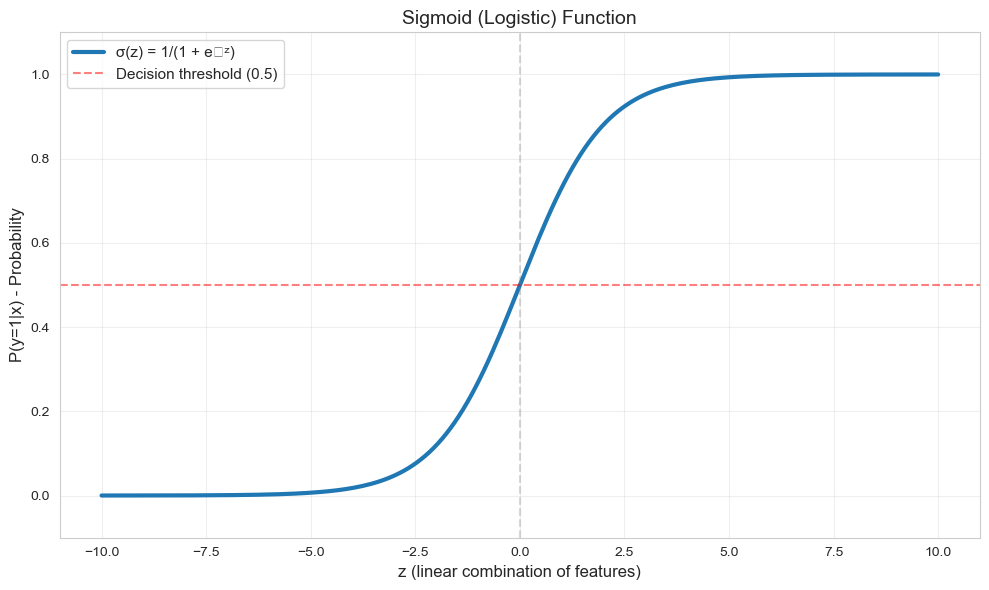

Sigmoid Function Properties
σ(-∞) = 0.0000000000 ≈ 0
σ(0)   = 0.5000000000
σ(+∞) = 1.0000000000 ≈ 1

σ(-5) = 0.0067  (very unlikely)
σ(5)  = 0.9933   (very likely)

💡 Sigmoid squashes any real number to [0, 1] range
   This makes it perfect for probability estimation!


In [2]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z = np.linspace(-10, 10, 200)
probs = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, probs, linewidth=3, label='σ(z) = 1/(1 + e⁻ᶻ)')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Decision threshold (0.5)')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('z (linear combination of features)', fontsize=12)
plt.ylabel('P(y=1|x) - Probability', fontsize=12)
plt.title('Sigmoid (Logistic) Function', fontsize=14)
plt.legend(fontsize=11)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

print("Sigmoid Function Properties")
print("="*70)
print(f"σ(-∞) = {sigmoid(-100):.10f} ≈ 0")
print(f"σ(0)   = {sigmoid(0):.10f}")
print(f"σ(+∞) = {sigmoid(100):.10f} ≈ 1")
print(f"\nσ(-5) = {sigmoid(-5):.4f}  (very unlikely)")
print(f"σ(5)  = {sigmoid(5):.4f}   (very likely)")
print(f"\n💡 Sigmoid squashes any real number to [0, 1] range")
print("   This makes it perfect for probability estimation!")

## 2. Binary Classification

### 2.1 Simple 2D Example

In [3]:
# Generate binary classification data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

print("Binary Classification Dataset")
print("="*70)
print(f"Samples: {X.shape[0]}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")
print(f"Class distribution: {np.bincount(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Binary Classification Dataset
Samples: 200
Features: 2
Classes: [0 1]
Class distribution: [100 100]

Train set: 140 samples
Test set: 60 samples


In [4]:
# Train logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression Model")
print("="*70)
print(f"\nCoefficients (β): {log_reg.coef_[0]}")
print(f"Intercept (β₀): {log_reg.intercept_[0]:.4f}")

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)

print(f"\nExample predictions (first 5 test samples):")
for i in range(5):
    print(f"  Sample {i}: True={y_test[i]}, Predicted={y_pred[i]}, "
          f"P(class 0)={y_proba[i][0]:.3f}, P(class 1)={y_proba[i][1]:.3f}")

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

Logistic Regression Model

Coefficients (β): [ 2.17921248 -0.34090129]
Intercept (β₀): -0.0243

Example predictions (first 5 test samples):
  Sample 0: True=1, Predicted=1, P(class 0)=0.056, P(class 1)=0.944
  Sample 1: True=0, Predicted=0, P(class 0)=0.749, P(class 1)=0.251
  Sample 2: True=1, Predicted=1, P(class 0)=0.048, P(class 1)=0.952
  Sample 3: True=1, Predicted=1, P(class 0)=0.060, P(class 1)=0.940
  Sample 4: True=1, Predicted=1, P(class 0)=0.059, P(class 1)=0.941

Model Performance:
  Accuracy:  0.8667
  Precision: 0.8929
  Recall:    0.8333
  F1-Score:  0.8621


### 2.2 Decision Boundary Visualization

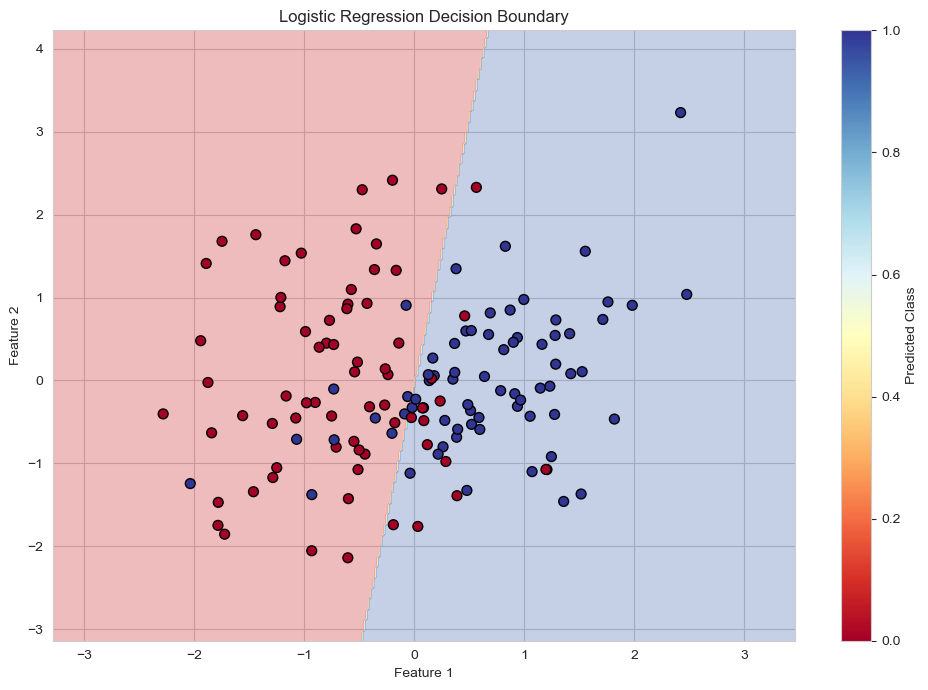

Decision Boundary:
  The line separating the two colored regions is where P(y=1) = 0.5
  This corresponds to β₀ + β₁x₁ + β₂x₂ = 0


In [5]:
# Plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Predicted Class')
    plt.tight_layout()
    plt.show()

# Plot
plot_decision_boundary(X_train_scaled, y_train, log_reg, 
                      "Logistic Regression Decision Boundary")

print("Decision Boundary:")
print("  The line separating the two colored regions is where P(y=1) = 0.5")
print("  This corresponds to β₀ + β₁x₁ + β₂x₂ = 0")

### 2.3 Confusion Matrix and Classification Report

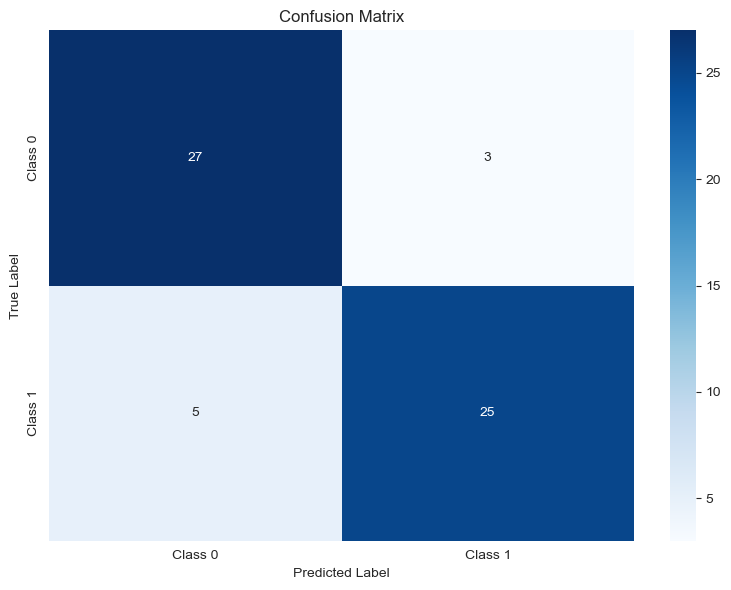


Confusion Matrix Breakdown:
  True Negatives (TN):  27
  False Positives (FP): 3
  False Negatives (FN): 5
  True Positives (TP):  25

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.90      0.87        30
     Class 1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
tn, fp, fn, tp = cm.ravel()
print(f"  True Negatives (TN):  {tn}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Positives (TP):  {tp}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

### 2.4 ROC Curve and AUC

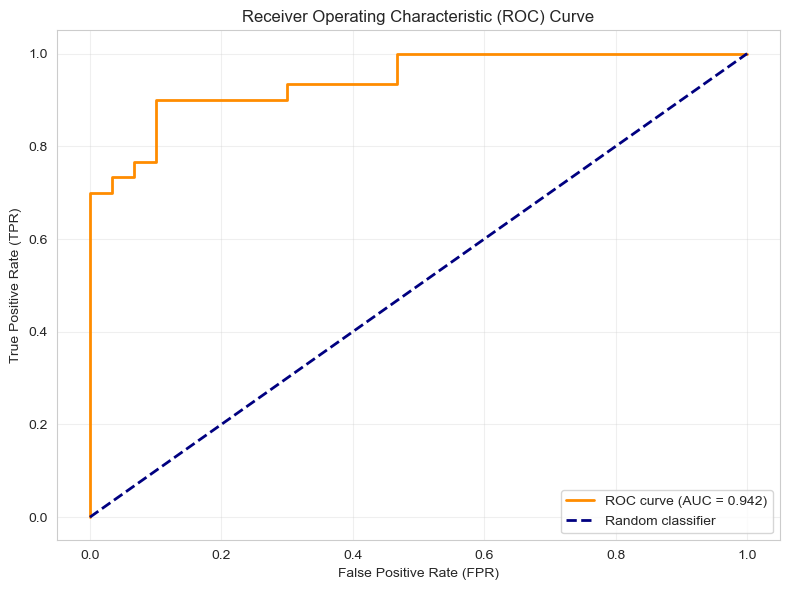

ROC-AUC Analysis:
AUC Score: 0.9422

Interpretation:
  AUC = 0.5: Random classifier (no discrimination)
  AUC = 1.0: Perfect classifier
  Our model: 0.942 - Excellent


In [7]:
# Get probability predictions
y_proba_pos = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_pos)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC-AUC Analysis:")
print("="*70)
print(f"AUC Score: {roc_auc:.4f}")
print(f"\nInterpretation:")
print(f"  AUC = 0.5: Random classifier (no discrimination)")
print(f"  AUC = 1.0: Perfect classifier")
print(f"  Our model: {roc_auc:.3f} - {('Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair')}")

## 3. Regularization in Logistic Regression

### 3.1 Effect of Regularization (C parameter)

In [8]:
# Test different C values (note: larger C = less regularization)
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
penalties = ['l2', 'l1']  # Ridge and Lasso

results = []

print("Regularization Analysis")
print("="*70)
print("Note: Larger C = Less regularization\n")

for penalty in penalties:
    print(f"\n{penalty.upper()} Penalty:")
    for C in C_values:
        # Train model
        if penalty == 'l1':
            model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', random_state=42)
        else:
            model = LogisticRegression(C=C, penalty=penalty, random_state=42)
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluate
        train_acc = model.score(X_train_scaled, y_train)
        test_acc = model.score(X_test_scaled, y_test)
        
        # Coefficient magnitudes
        coef_magnitude = np.linalg.norm(model.coef_)
        n_nonzero = np.sum(model.coef_[0] != 0) if penalty == 'l1' else X.shape[1]
        
        results.append({
            'Penalty': penalty,
            'C': C,
            'Train_Acc': train_acc,
            'Test_Acc': test_acc,
            'Coef_Norm': coef_magnitude,
            'Nonzero_Coefs': n_nonzero
        })
        
        print(f"  C={C:6.2f}: Train={train_acc:.3f}, Test={test_acc:.3f}, "
              f"||β||={coef_magnitude:.3f}, Features={n_nonzero}")

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("Summary:")
print(results_df.to_string(index=False))

Regularization Analysis
Note: Larger C = Less regularization


L2 Penalty:
  C=  0.01: Train=0.829, Test=0.900, ||β||=0.350, Features=2
  C=  0.10: Train=0.829, Test=0.867, ||β||=1.274, Features=2
  C=  1.00: Train=0.829, Test=0.867, ||β||=2.206, Features=2
  C= 10.00: Train=0.829, Test=0.867, ||β||=2.502, Features=2
  C=100.00: Train=0.829, Test=0.867, ||β||=2.542, Features=2

L1 Penalty:
  C=  0.01: Train=0.500, Test=0.500, ||β||=0.000, Features=0
  C=  0.10: Train=0.821, Test=0.900, ||β||=1.407, Features=1
  C=  1.00: Train=0.829, Test=0.867, ||β||=2.354, Features=2
  C= 10.00: Train=0.829, Test=0.867, ||β||=2.525, Features=2
  C=100.00: Train=0.829, Test=0.867, ||β||=2.544, Features=2

Summary:
Penalty      C  Train_Acc  Test_Acc  Coef_Norm  Nonzero_Coefs
     l2   0.01   0.828571  0.900000   0.349743              2
     l2   0.10   0.828571  0.866667   1.274373              2
     l2   1.00   0.828571  0.866667   2.205715              2
     l2  10.00   0.828571  0.866667   2.5024

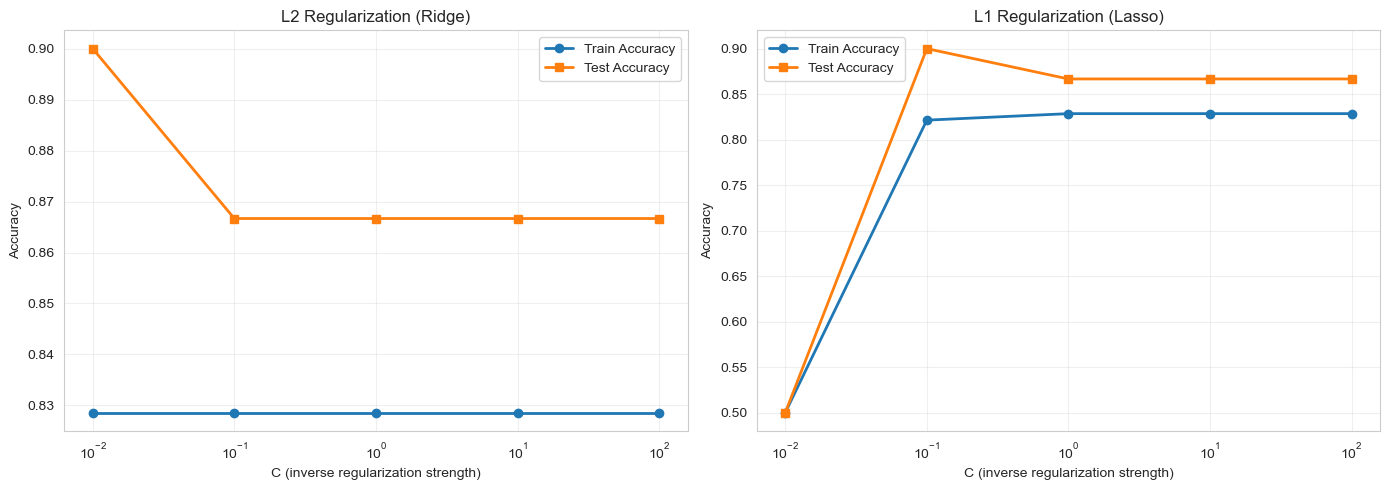


💡 Observations:
  - Low C (strong regularization): May underfit
  - High C (weak regularization): May overfit
  - L1 can set coefficients to zero (feature selection)
  - L2 shrinks coefficients but keeps all features


In [9]:
# Visualize regularization effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# L2 regularization
l2_results = results_df[results_df['Penalty'] == 'l2']
axes[0].semilogx(l2_results['C'], l2_results['Train_Acc'], 'o-', label='Train Accuracy', linewidth=2)
axes[0].semilogx(l2_results['C'], l2_results['Test_Acc'], 's-', label='Test Accuracy', linewidth=2)
axes[0].set_xlabel('C (inverse regularization strength)')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('L2 Regularization (Ridge)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# L1 regularization
l1_results = results_df[results_df['Penalty'] == 'l1']
axes[1].semilogx(l1_results['C'], l1_results['Train_Acc'], 'o-', label='Train Accuracy', linewidth=2)
axes[1].semilogx(l1_results['C'], l1_results['Test_Acc'], 's-', label='Test Accuracy', linewidth=2)
axes[1].set_xlabel('C (inverse regularization strength)')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('L1 Regularization (Lasso)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("  - Low C (strong regularization): May underfit")
print("  - High C (weak regularization): May overfit")
print("  - L1 can set coefficients to zero (feature selection)")
print("  - L2 shrinks coefficients but keeps all features")

## 4. Multiclass Classification

### 4.1 Iris Dataset (3 classes)

In [10]:
# Load iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris Dataset - Multiclass Classification")
print("="*70)
print(f"Samples: {X_iris.shape[0]}")
print(f"Features: {X_iris.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print(f"Class distribution: {np.bincount(y_iris)}")

# Split and scale
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print(f"\nTrain set: {X_train_iris.shape[0]} samples")
print(f"Test set: {X_test_iris.shape[0]} samples")

Iris Dataset - Multiclass Classification
Samples: 150
Features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

Train set: 105 samples
Test set: 45 samples


### 4.2 Multiclass Strategies: OvR vs Multinomial

In [11]:
# Compare multiclass strategies
strategies = {
    'One-vs-Rest (OvR)': LogisticRegression(multi_class='ovr', random_state=42),
    'Multinomial': LogisticRegression(multi_class='multinomial', random_state=42)
}

print("Multiclass Strategy Comparison")
print("="*70)

for name, model in strategies.items():
    # Train
    model.fit(X_train_iris_scaled, y_train_iris)
    
    # Evaluate
    train_acc = model.score(X_train_iris_scaled, y_train_iris)
    test_acc = model.score(X_test_iris_scaled, y_test_iris)
    
    # Predictions
    y_pred = model.predict(X_test_iris_scaled)
    y_proba = model.predict_proba(X_test_iris_scaled)
    
    print(f"\n{name}:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    print(f"  Coefficients shape: {model.coef_.shape}")
    print(f"  (rows = classes, columns = features)")
    
    # Confusion matrix
    cm = confusion_matrix(y_test_iris, y_pred)
    print(f"\n  Confusion Matrix:")
    print(f"  {cm}")
    
    # Classification report
    print(f"\n  Classification Report:")
    print(classification_report(y_test_iris, y_pred, target_names=iris.target_names))

print("\n💡 OvR vs Multinomial:")
print("  - OvR: Trains 3 binary classifiers (one per class)")
print("  - Multinomial: Trains a single multiclass classifier")
print("  - Multinomial often performs better for multiclass problems")

Multiclass Strategy Comparison


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



One-vs-Rest (OvR):
  Train Accuracy: 0.9524
  Test Accuracy:  0.8444
  Coefficients shape: (3, 4)
  (rows = classes, columns = features)

  Confusion Matrix:
  [[15  0  0]
 [ 0 11  4]
 [ 0  3 12]]

  Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      0.73      0.76        15
   virginica       0.75      0.80      0.77        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45


Multinomial:
  Train Accuracy: 0.9810
  Test Accuracy:  0.9111
  Coefficients shape: (3, 4)
  (rows = classes, columns = features)

  Confusion Matrix:
  [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

  Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica  

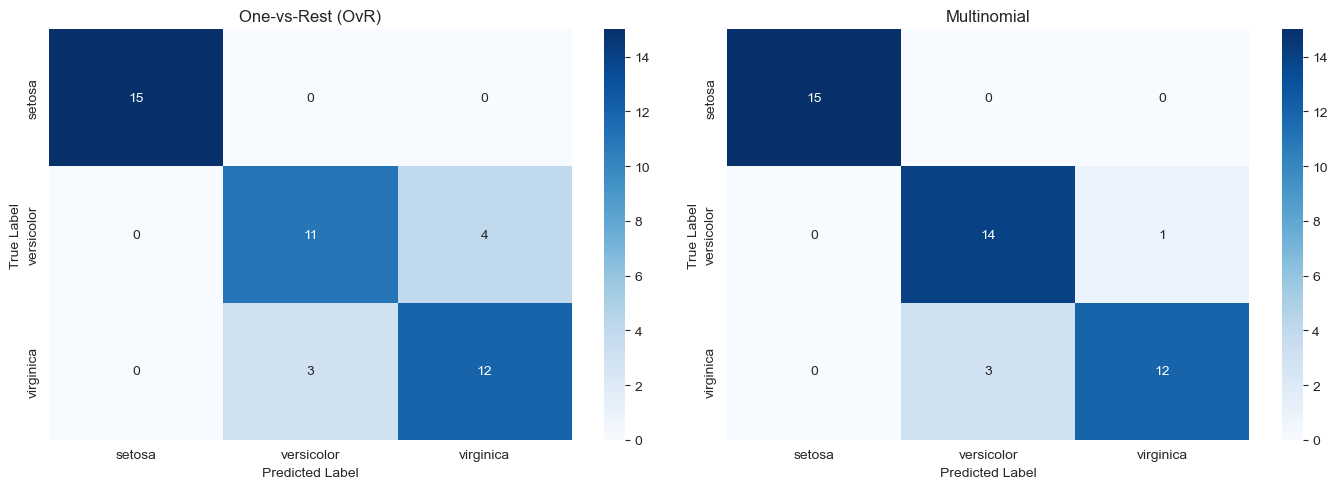

In [12]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (name, model) in enumerate(strategies.items()):
    y_pred = model.predict(X_test_iris_scaled)
    cm = confusion_matrix(y_test_iris, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                ax=axes[idx])
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_title(f'{name}')

plt.tight_layout()
plt.show()

## 5. Real-World Example: Breast Cancer Detection

### 5.1 Dataset Exploration

In [13]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Breast Cancer Wisconsin Dataset")
print("="*70)
print(f"Samples: {X_cancer.shape[0]}")
print(f"Features: {X_cancer.shape[1]}")
print(f"\nTarget classes:")
print(f"  0: Malignant (cancerous)")
print(f"  1: Benign (non-cancerous)")
print(f"\nClass distribution:")
print(f"  Malignant: {np.sum(y_cancer == 0)}")
print(f"  Benign: {np.sum(y_cancer == 1)}")
print(f"\nFeatures (first 10): {cancer.feature_names[:10].tolist()}...")

# Split and scale
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

Breast Cancer Wisconsin Dataset
Samples: 569
Features: 30

Target classes:
  0: Malignant (cancerous)
  1: Benign (non-cancerous)

Class distribution:
  Malignant: 212
  Benign: 357

Features (first 10): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']...


### 5.2 Model Training and Hyperparameter Tuning

In [14]:
# Grid search for best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("Hyperparameter Tuning with GridSearchCV")
print("="*70)
print("Searching for best parameters...\n")

grid_search.fit(X_train_cancer_scaled, y_train_cancer)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC score: {grid_search.best_score_:.4f}")

# Get best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_cancer = best_model.predict(X_test_cancer_scaled)
y_proba_cancer = best_model.predict_proba(X_test_cancer_scaled)[:, 1]

test_acc = accuracy_score(y_test_cancer, y_pred_cancer)
test_auc = roc_auc_score(y_test_cancer, y_proba_cancer)
test_f1 = f1_score(y_test_cancer, y_pred_cancer)

print(f"\nTest Set Performance:")
print(f"  Accuracy:  {test_acc:.4f}")
print(f"  AUC:       {test_auc:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, 
                          target_names=['Malignant', 'Benign']))

Hyperparameter Tuning with GridSearchCV
Searching for best parameters...

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV AUC score: 0.9941

Test Set Performance:
  Accuracy:  0.9825
  AUC:       0.9960
  F1-Score:  0.9861

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



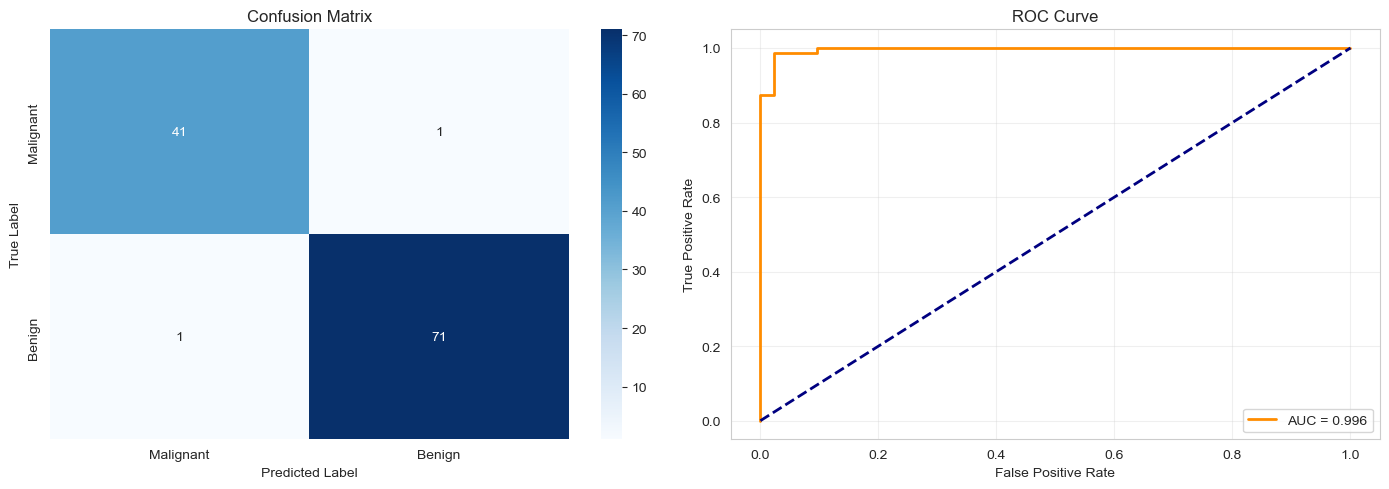


💡 Medical Application Note:
  - High recall (sensitivity) is crucial to avoid missing cancer cases
  - False negatives (cancer classified as benign) are more serious
  - Threshold tuning may be needed based on clinical requirements


In [15]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_cancer, y_pred_cancer)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            ax=axes[0])
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cancer, y_proba_cancer)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Medical Application Note:")
print("  - High recall (sensitivity) is crucial to avoid missing cancer cases")
print("  - False negatives (cancer classified as benign) are more serious")
print("  - Threshold tuning may be needed based on clinical requirements")

### 5.3 Feature Importance Analysis

Top 10 Most Important Features
             Feature  Coefficient  Abs_Coefficient
       worst texture    -0.548639         0.548639
        worst radius    -0.515598         0.515598
worst concave points    -0.496777         0.496777
          worst area    -0.495664         0.495664
     worst perimeter    -0.472829         0.472829
        radius error    -0.459034         0.459034
        mean texture    -0.428021         0.428021
 mean concave points    -0.413799         0.413799
          area error    -0.409919         0.409919
      worst symmetry    -0.405547         0.405547


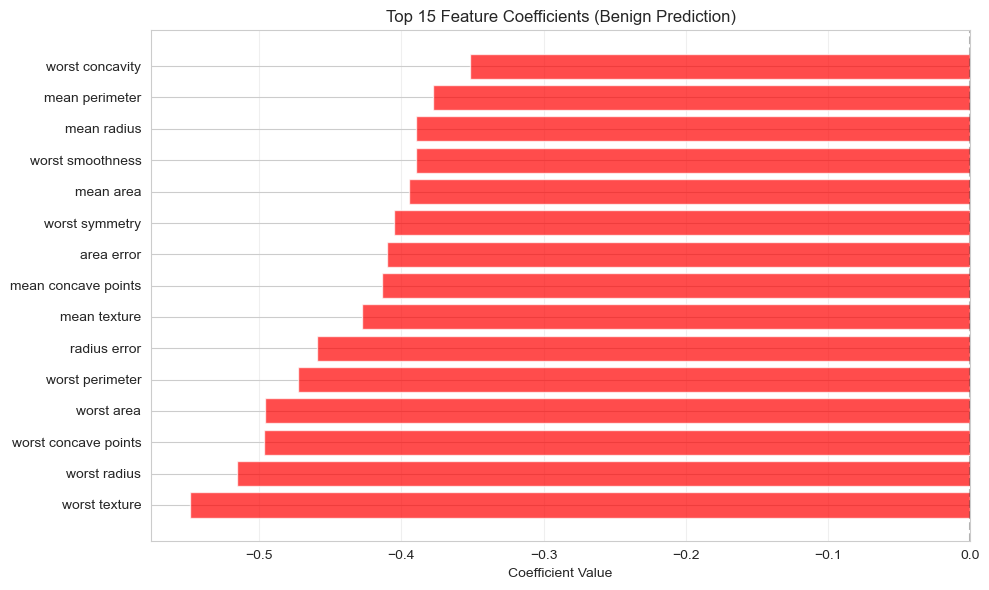


Interpretation:
  - Positive coefficients → Higher values increase probability of Benign
  - Negative coefficients → Higher values increase probability of Malignant


In [16]:
# Analyze feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Coefficient': best_model.coef_[0],
    'Abs_Coefficient': np.abs(best_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features")
print("="*70)
print(feature_importance.head(10).to_string(index=False))

# Plot top 15 features
top_features = feature_importance.head(15)
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients (Benign Prediction)')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  - Positive coefficients → Higher values increase probability of Benign")
print("  - Negative coefficients → Higher values increase probability of Malignant")

## 6. Probability Calibration

### 6.1 Checking Calibration

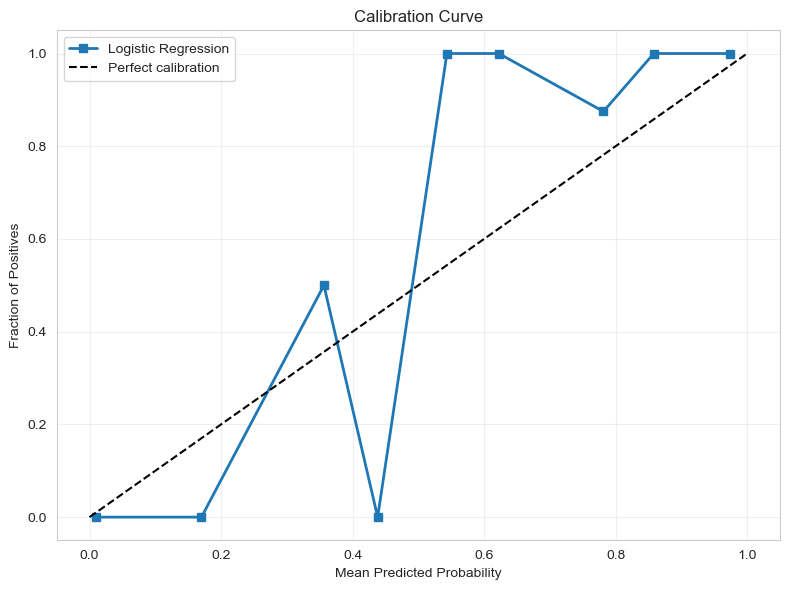

Probability Calibration:
A well-calibrated model's predicted probabilities match actual frequencies.

Example: If model predicts 70% probability for 100 samples,
         ~70 of them should actually be positive.

Logistic Regression is generally well-calibrated by default!


In [17]:
# Calibration curve
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test_cancer, y_proba_cancer, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Logistic Regression', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Probability Calibration:")
print("="*70)
print("A well-calibrated model's predicted probabilities match actual frequencies.")
print("\nExample: If model predicts 70% probability for 100 samples,")
print("         ~70 of them should actually be positive.")
print("\nLogistic Regression is generally well-calibrated by default!")

## Summary and Best Practices

### Quick Reference

```python
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Binary classification
model = LogisticRegression(
    C=1.0,              # Inverse of regularization strength
    penalty='l2',       # 'l1', 'l2', 'elasticnet', 'none'
    solver='lbfgs',     # Optimization algorithm
    max_iter=1000,      # Maximum iterations
    random_state=42
)

# Multiclass
model = LogisticRegression(
    multi_class='multinomial',  # or 'ovr'
    C=1.0,
    random_state=42
)

# Always standardize features!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)
```

### Key Parameters

| Parameter | Description | Typical Values |
|-----------|-------------|----------------|
| `C` | Inverse regularization strength | 0.01 to 100 |
| `penalty` | Regularization type | 'l1', 'l2', 'elasticnet' |
| `solver` | Optimization algorithm | 'lbfgs', 'liblinear', 'saga' |
| `multi_class` | Multiclass strategy | 'ovr', 'multinomial' |
| `class_weight` | Handle imbalanced data | 'balanced', None |

### Solver Selection

| Solver | Penalty | Use Case |
|--------|---------|----------|
| `lbfgs` | L2 | Default, good for most cases |
| `liblinear` | L1, L2 | Small datasets, binary classification |
| `saga` | L1, L2, ElasticNet | Large datasets, all penalties |
| `newton-cg` | L2 | Large datasets, L2 only |

### Evaluation Metrics

**Binary Classification:**
- **Accuracy**: Overall correctness
- **Precision**: Of predicted positives, how many are correct
- **Recall (Sensitivity)**: Of actual positives, how many are found
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Classifier's discrimination ability

**Multiclass:**
- Weighted/Macro/Micro averaged metrics
- Confusion matrix
- Per-class precision/recall

### Best Practices

1. ✓ **Always standardize features** - Essential for regularization
2. ✓ **Use cross-validation** - For hyperparameter tuning
3. ✓ **Check class imbalance** - Use `class_weight='balanced'` if needed
4. ✓ **Start with default parameters** - Then tune C
5. ✓ **Monitor multiple metrics** - Don't rely on accuracy alone
6. ✓ **Use stratified splits** - Preserve class ratios
7. ✓ **Check probability calibration** - Important for probability estimates
8. ✓ **Visualize decision boundaries** - Understand model behavior

### Common Pitfalls

1. ❌ Not standardizing features
2. ❌ Using wrong solver for penalty
3. ❌ Ignoring class imbalance
4. ❌ Not checking convergence (increase `max_iter` if needed)
5. ❌ Using accuracy for imbalanced data
6. ❌ Not using stratified splits
7. ❌ Forgetting to scale test data with training scaler
8. ❌ Misinterpreting coefficients without standardization

### When to Use Logistic Regression

✓ **Good for:**
- Binary and multiclass classification
- Interpretable models (coefficients show feature impact)
- Probability estimates needed
- Baseline models
- Linear decision boundaries
- Fast training and prediction

✗ **Not ideal for:**
- Highly non-linear problems (try polynomial features or kernel methods)
- Complex decision boundaries
- Image/text with raw pixels/words (use CNNs/RNNs)

### Next Steps

- Support Vector Machines (SVM)
- Decision Trees and Random Forests
- Gradient Boosting (XGBoost, LightGBM)
- Neural Networks for classification
- Advanced feature engineering
- Handling imbalanced datasets